In [15]:
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd
import numpy as np

In [16]:
df_master = pd.read_parquet('../master/master.parquet')

In [17]:
df_master.iloc[332409]

user_id                                  CSP0983
dateString                              20100104
userDate                        CSP0983_20100104
isEmployed                                     1
isInsider                                      0
hasLogin                                     1.0
firstActivity                                NaN
hasConnect                                   NaN
role                                  Accountant
dateHour                                     8.0
probLogonRole                           0.211338
webCount                                    42.0
countPC                                      1.0
employee_name             Carissa September Pena
psyc_O                                        43
psyc_C                                        27
psyc_E                                        17
psyc_A                                        31
psyc_N                                        27
numMonthsEmployed                             18
sumExtEmailSize     

In [18]:
for colToStd in ['webCount', 'webQuestionableUsage','numExtEmails','sumExtEmailAttachments','sumExtEmailSize']:
    df_roleStd = df_master.groupby('role').apply(lambda x: (x[colToStd] - x[colToStd].mean())/x[colToStd].std()).to_frame()\
    .reset_index(level=0).drop('role', axis=1).rename(columns={colToStd:colToStd+'RoleStd'})
    df_master = df_master.join(df_roleStd)

In [19]:
for colToStd in ['webCount', 'webQuestionableUsage','numExtEmails','sumExtEmailAttachments','sumExtEmailSize']:
    df_roleStd = df_master.groupby('user_id').apply(lambda x: (x[colToStd] - x[colToStd].mean())/x[colToStd].std()).to_frame()\
    .reset_index(level=0).drop('user_id', axis=1).rename(columns={colToStd:colToStd+'UserStd'})
    df_master = df_master.join(df_roleStd)

In [20]:
df_master = pd.get_dummies(df_master, columns=['role'])

In [21]:
df_master = df_master.fillna(0)

In [22]:
df_master.columns

Index(['user_id', 'dateString', 'userDate', 'isEmployed', 'isInsider',
       'hasLogin', 'firstActivity', 'hasConnect', 'dateHour', 'probLogonRole',
       'webCount', 'countPC', 'employee_name', 'psyc_O', 'psyc_C', 'psyc_E',
       'psyc_A', 'psyc_N', 'numMonthsEmployed', 'sumExtEmailSize',
       'sumExtEmailAttachments', 'numExtEmails', 'probLogonUser',
       'webQuestionableUsage', 'webCountRoleStd',
       'webQuestionableUsageRoleStd', 'numExtEmailsRoleStd',
       'sumExtEmailAttachmentsRoleStd', 'sumExtEmailSizeRoleStd',
       'webCountUserStd', 'webQuestionableUsageUserStd', 'numExtEmailsUserStd',
       'sumExtEmailAttachmentsUserStd', 'sumExtEmailSizeUserStd',
       'role_Accountant', 'role_AdministrativeAssistant',
       'role_AdministrativeStaff', 'role_AssemblySupervisor', 'role_Attorney',
       'role_ChiefEngineer', 'role_ComputerProgrammer',
       'role_ComputerScientist', 'role_ComputerTrainer', 'role_Director',
       'role_ElectricalEngineer', 'role_Engineer',

In [46]:
features = ['isEmployed', 'isInsider',
       'hasLogin', 'firstActivity', 'hasConnect', 'probLogonRole',
       'webCount', 'countPC', 'psyc_O', 'psyc_C', 'psyc_E',
       'psyc_A', 'psyc_N', 'numMonthsEmployed', 'sumExtEmailSize',
       'sumExtEmailAttachments', 'numExtEmails', 'probLogonUser',
       'webQuestionableUsage', 'role_Accountant',
       'role_AdministrativeAssistant', 'role_AdministrativeStaff',
       'role_AssemblySupervisor', 'role_Attorney', 'role_ChiefEngineer',
       'role_ComputerProgrammer', 'role_ComputerScientist',
       'role_ComputerTrainer', 'role_Director', 'role_ElectricalEngineer',
       'role_Engineer', 'role_FieldServiceEngineer', 'role_FinancialAnalyst',
       'role_HardwareEngineer', 'role_HealthSafetyEngineer',
       'role_HumanResourceSpecialist', 'role_ITAdmin',
       'role_IndustrialEngineer', 'role_LabManager', 'role_ManagementTrainer',
       'role_Manager', 'role_MaterialsEngineer', 'role_Mathematician',
       'role_MechanicalEngineer', 'role_Nurse', 'role_NursePractitioner',
       'role_Physicist', 'role_President', 'role_ProductionLineWorker',
       'role_PurchasingClerk', 'role_Salesman', 'role_Scientist',
       'role_SecurityGuard', 'role_SoftwareEngineer', 'role_Statistician',
       'role_SystemsEngineer', 'role_TechnicalTrainer', 'role_Technician',
       'role_TestEngineer', 'role_VicePresident','webCountStd', 'webQuestionableUsageStd']

In [14]:
features = ['isEmployed',
       'hasLogin', 'firstActivity', 'hasConnect', 'probLogonRole', 'countPC', 'psyc_O', 'psyc_C', 'psyc_E',
       'psyc_A', 'psyc_N', 'numMonthsEmployed', 'sumExtEmailSize',
       'sumExtEmailAttachments', 'numExtEmails', 'probLogonUser', 'webCountStd',
       'webQuestionableUsageStd', 'numExtEmailsRoleStd',
       'sumExtEmailAttachmentsRoleStd', 'sumExtEmailSizeRoleStd',
       'webCountUserStd', 'webQuestionableUsageUserStd', 'numExtEmailsUserStd',
       'sumExtEmailAttachmentsUserStd', 'sumExtEmailSizeUserStd']

In [23]:
contamination = len(df_master[df_master['isInsider'] == 1])/len(df_master['isInsider'])
print(contamination)
isolation_forest = IsolationForest(n_estimators=100, contamination=0.01)

8.801129059127871e-05


In [26]:
isolation_forest.fit(df_master.drop(['isInsider','user_id', 'dateString', 'userDate', 'dateHour','employee_name'], axis=1))

IsolationForest(contamination=0.01)

In [28]:
anomaly_scores = isolation_forest.decision_function(df_master.drop(['isInsider','user_id', 'dateString', 'userDate', 'dateHour','employee_name'], axis=1))

In [29]:
df_master['anomaly_score'] = anomaly_scores

In [30]:
df_master[df_master['isInsider'] == 1][['user_id','isInsider','anomaly_score']]

,user_id,isInsider,anomaly_score
54149,CSF0929,1,0.099933
54150,CSF0929,1,0.106056
54151,CSF0929,1,0.100315
54152,CSF0929,1,0.099576
54153,CSF0929,1,0.110180
54158,CSF0929,1,0.102642
54159,CSF0929,1,0.103758
54160,CSF0929,1,0.099933
54161,CSF0929,1,0.106056
54166,CSF0929,1,0.100208


<Axes: >

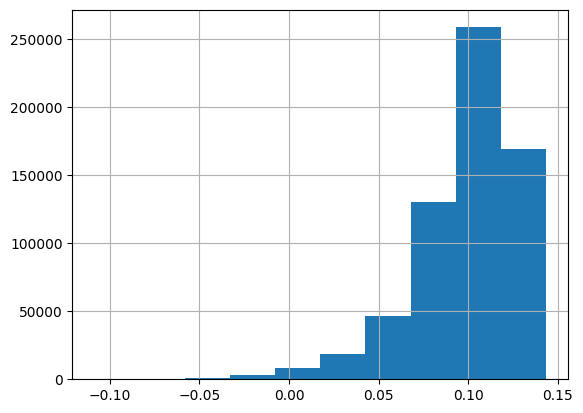

In [31]:
df_master['anomaly_score'].hist()

<Axes: >

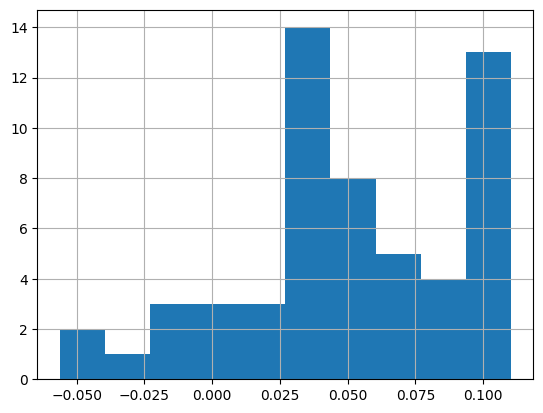

In [32]:
df_master[df_master['isInsider'] == 1]['anomaly_score'].hist()

In [33]:
pd.set_option('display.max_rows', 500)
df_master[df_master['role_ITAdmin'] != 1].nsmallest(10, 'anomaly_score').transpose()

,570550,612149,559055,559056,331420,615396,331421,559054,628765,628907
user_id,EBS0706,CBL0969,AYN0502,AYN0502,AJP0155,PTA0303,AJP0155,AYN0502,PCM0369,PCM0369
dateString,20110413,20100405,20100816,20100816,20100723,20100222,20100723,20100816,20101210,20110501
userDate,EBS0706_20110413,CBL0969_20100405,AYN0502_20100816,AYN0502_20100816,AJP0155_20100723,PTA0303_20100222,AJP0155_20100723,AYN0502_20100816,PCM0369_20101210,PCM0369_20110501
isEmployed,1,1,1,1,1,1,1,1,1,1
isInsider,0,0,0,0,0,0,0,0,0,0
hasLogin,1.0,1.0,3.0,3.0,2.0,1.0,2.0,3.0,1.0,1.0
firstActivity,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
hasConnect,0.0,8.0,6.0,6.0,0.0,0.0,0.0,6.0,8.0,9.0
dateHour,7.0,9.0,15.0,19.0,8.0,7.0,12.0,9.0,7.0,7.0
probLogonRole,0.270511,0.226949,0.011743,0.001312,0.202112,0.270511,0.072139,0.131576,0.26566,0.26566


In [93]:
param_grid = {'n_estimators': [50, 100, 150],
              'max_samples': [0.5, 0.7, 0.9],
              'max_features': [0.5, 0.7, 0.9],
              'contamination': [0.01, 0.05, 0.1]}

In [94]:
iso_model = IsolationForest(random_state=42)

In [95]:
grid_search = GridSearchCV(iso_model, param_grid, cv=5, scoring='f1_macro', n_jobs=-1)

In [96]:
grid_search.fit(df_master[features], df_master['isInsider'])

/home/vzb403/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/home/vzb403/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/home/vzb403/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/home/vzb403/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/home/vzb403/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/home/vzb403/.local/lib/python3.10/site-packages/sklearn/base.py:

GridSearchCV(cv=5, estimator=IsolationForest(random_state=42), n_jobs=-1,
             param_grid={'contamination': [0.01, 0.05, 0.1],
                         'max_features': [0.5, 0.7, 0.9],
                         'max_samples': [0.5, 0.7, 0.9],
                         'n_estimators': [50, 100, 150]},
             scoring='f1_macro')

In [78]:
grid_search.best_params_

{'contamination': 0.01,
 'max_features': 0.9,
 'max_samples': 0.5,
 'n_estimators': 150}

In [79]:
grid_search.best_score_

1.1632364410252343e-05